In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [81]:
# Part 1: Generate a CSV file simulating survey responses

# Create a function to generate random survey responses
def generate_survey_response():
    age = np.random.randint(18, 60)
    frequency = np.random.choice(['Daily', 'Weekly', 'Monthly', 'Rarely'])
    time_of_day = np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'])
    safety_perception = np.random.choice(['Very Safe', 'Safe', 'Neutral', 'Unsafe', 'Very Unsafe'])
    incident_experience = np.random.choice(['Yes', 'No'], p=[0.15, 0.85])
    security_measures = np.random.choice(['Adequate', 'Inadequate'])
    overall_satisfaction = np.random.choice(['Satisfied', 'Neutral', 'Dissatisfied'])
    
    return [age, frequency, time_of_day, safety_perception, incident_experience, security_measures, overall_satisfaction]

# Generate 200 survey responses
survey_data = [generate_survey_response() for _ in range(500)]

# Create a DataFrame and save to CSV
df = pd.DataFrame(survey_data, columns=['Age', 'Frequency', 'TimeOfDay', 'SafetyPerception', 'IncidentExperience', 'SecurityMeasures', 'OverallSatisfaction'])
df.to_csv('survey_responses.csv', index=False)
print("CSV file 'survey_responses.csv' has been generated.")

CSV file 'survey_responses.csv' has been generated.


In [83]:
# Part 2: Create a decision tree classifier

# Load the data
df = pd.read_csv('survey_responses.csv')
print(df)

# Initialize LabelEncoders for each categorical column
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split features and target
X = df.drop('OverallSatisfaction', axis=1)
y = df['OverallSatisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")


# Interpretation:
# - Train accuracy shows how well the model fits the training data.
# - Test accuracy indicates how well the model generalizes to unseen data.
# - If test accuracy is significantly lower than train accuracy, it might indicate overfitting.
# - A good model should have similar train and test accuracies, ideally above 0.7-0.8.

# Conclusion:
# - If both accuracies are high, the model is performing well.
# - If accuracies are low, the model might need improvement or the problem might be complex.


     Age Frequency  TimeOfDay SafetyPerception IncidentExperience  \
0     39   Monthly  Afternoon        Very Safe                 No   
1     22     Daily    Morning      Very Unsafe                 No   
2     39    Weekly    Morning        Very Safe                 No   
3     49   Monthly      Night        Very Safe                 No   
4     45    Weekly    Evening             Safe                 No   
..   ...       ...        ...              ...                ...   
495   36   Monthly      Night          Neutral                Yes   
496   33    Rarely    Evening          Neutral                 No   
497   35    Rarely    Morning             Safe                 No   
498   42     Daily  Afternoon        Very Safe                 No   
499   23   Monthly      Night           Unsafe                 No   

    SecurityMeasures OverallSatisfaction  
0           Adequate           Satisfied  
1         Inadequate        Dissatisfied  
2           Adequate        Dissatisfied  

Decision tree visualization saved as 'decision_tree.png'


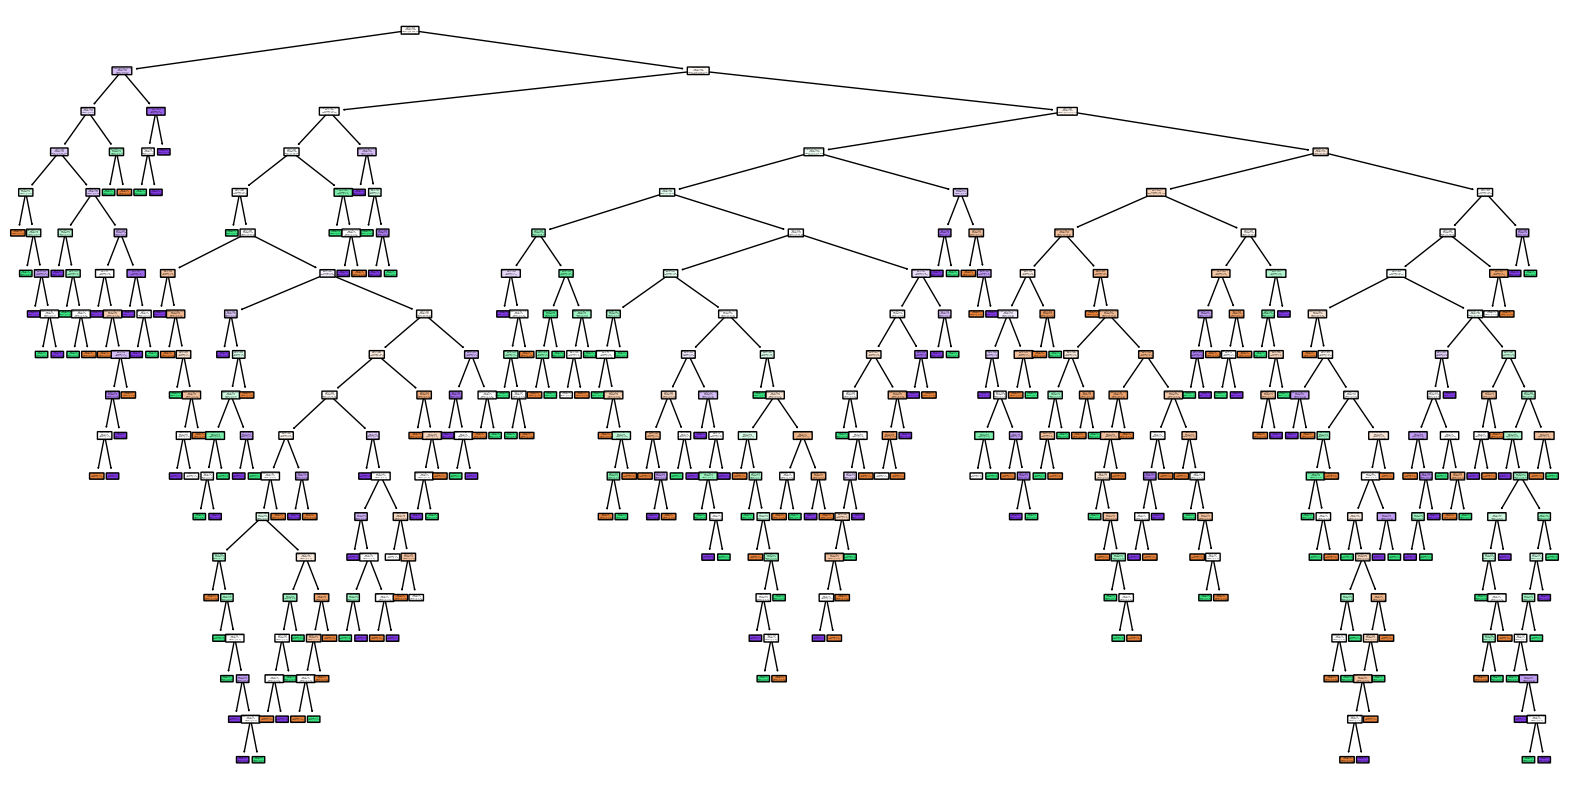

In [85]:
# Part 3: Visualize the decision tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['OverallSatisfaction'].classes_, filled=True, rounded=True)
plt.savefig('decision_tree.png')
print("Decision tree visualization saved as 'decision_tree.png'")

# Interpretation:
# - The decision tree visualization shows the structure of the model's decision-making process.
# - Each node represents a decision based on a feature, leading to leaf nodes with predictions.
# - The color intensity in nodes indicates the purity of the samples in that node.

# Conclusion:
# - Analyze the tree to understand which features are most important for classification.
# - A very deep tree might indicate overfitting, while a shallow tree might be too simple.


In [87]:
# Part 4: Simulate scenarios

def simulate_scenario(age, frequency, time_of_day, safety_perception, incident_experience, security_measures):
    # Create a dictionary with feature names and their values
    input_dict = {
        'Age': age,
        'Frequency': label_encoders['Frequency'].transform([frequency])[0],
        'TimeOfDay': label_encoders['TimeOfDay'].transform([time_of_day])[0],
        'SafetyPerception': label_encoders['SafetyPerception'].transform([safety_perception])[0],
        'IncidentExperience': label_encoders['IncidentExperience'].transform([incident_experience])[0],
        'SecurityMeasures': label_encoders['SecurityMeasures'].transform([security_measures])[0]
    }
    
    # Convert the dictionary to a DataFrame
    input_df = pd.DataFrame([input_dict])
    
    # Make prediction
    prediction = clf.predict(input_df)[0]
    satisfaction = label_encoders['OverallSatisfaction'].inverse_transform([prediction])[0]
    
    return satisfaction

# Example scenarios
scenarios = [
    (25, 'Daily', 'Morning', 'Safe', 'No', 'Adequate'),
    (40, 'Weekly', 'Evening', 'Unsafe', 'Yes', 'Inadequate'),
    (55, 'Monthly', 'Afternoon', 'Neutral', 'No', 'Adequate')
]

for i, scenario in enumerate(scenarios, 1):
    result = simulate_scenario(*scenario)
    print(f"Scenario {i}: {scenario}")
    print(f"Predicted satisfaction: {result}\n")

# Interpretation:
# - Each scenario represents a hypothetical public transportation user with specific characteristics.
# - The model predicts the overall satisfaction for each scenario.

# Conclusion:
# - Analyze how different combinations of features lead to different satisfaction predictions.
# - This can help identify which factors most strongly influence user satisfaction.


Scenario 1: (25, 'Daily', 'Morning', 'Safe', 'No', 'Adequate')
Predicted satisfaction: Satisfied

Scenario 2: (40, 'Weekly', 'Evening', 'Unsafe', 'Yes', 'Inadequate')
Predicted satisfaction: Dissatisfied

Scenario 3: (55, 'Monthly', 'Afternoon', 'Neutral', 'No', 'Adequate')
Predicted satisfaction: Satisfied



In [89]:
# Part 5: Feature importance

# Additional code to display feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("Feature Importances:")
print(feature_importance)

# Interpretation:
# - Feature importances show how much each feature contributes to the model's decisions.
# - Higher importance values indicate more influential features.

# Conclusion:
# - Identify the most important factors affecting overall satisfaction.
# - This information can guide policy decisions or improvements in the public transportation system.


Feature Importances:
              feature  importance
0                 Age    0.469088
3    SafetyPerception    0.208702
1           Frequency    0.120646
2           TimeOfDay    0.095529
5    SecurityMeasures    0.057537
4  IncidentExperience    0.048498


Feature importances visualization saved as 'feature_importances.png'


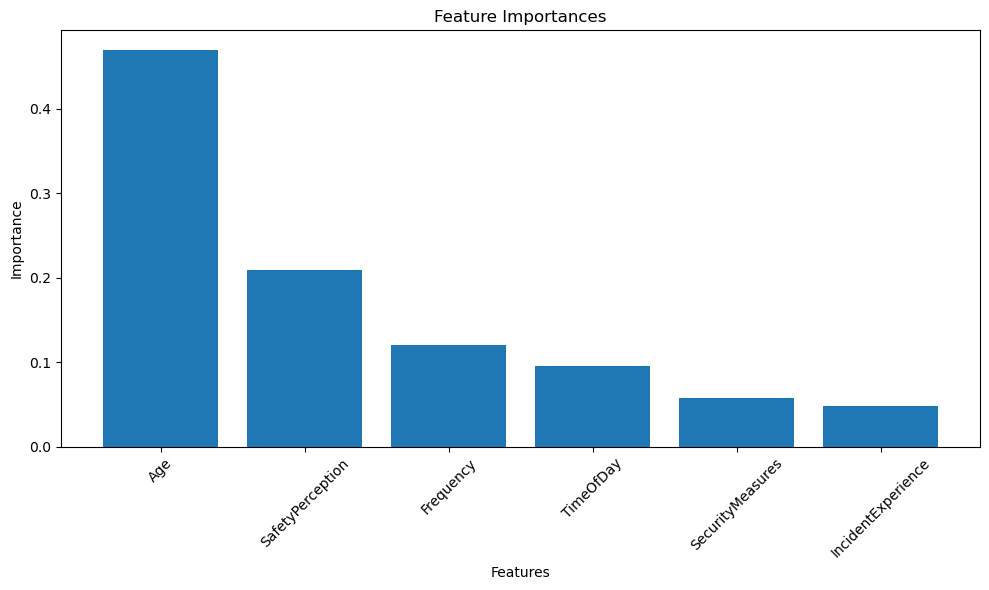

In [91]:
# Part 6: Feature importance visualization

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_importances.png')
print("Feature importances visualization saved as 'feature_importances.png'")

# Interpretation of the feature importances visualization:
# - The bar chart visually represents the importance of each feature.
# - Taller bars indicate more important features in the model's decision-making process.

# Overall conclusions:
# 1. The decision tree model provides insights into factors affecting public transportation satisfaction.
# 2. By analyzing the model's accuracy, structure, and feature importances, we can understand:
#    - How well we can predict user satisfaction
#    - Which factors are most crucial in determining satisfaction
#    - How different scenarios might lead to different satisfaction levels
# 3. This information can be valuable for:
#    - Improving public transportation services
#    - Targeting specific areas for enhancement
#    - Developing strategies to increase overall user satisfaction